<a href="https://colab.research.google.com/github/daje0601/pandas_study/blob/main/pandas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 시각화  
오늘 배울 내용은 시각화 입니다.  
어떻게 보면 가장 재미있는 부분이죠!  
코드만 입력하면 먼가 도표로 바로 눈에 보이기 때문에 무척 재미있습니다.  

그러나, 우리는 데이터에 맞게 적절한 도표를 사용해야하며,   
본 과제에서는 적절한 도표가 왜 중요한지에 포커싱을 맞추어 금일 수업을 진행토록 하겠습니다. 




## 1) matplotlib 


In [1]:
# 먼저 오늘 데이터에 대해 간략히 설명 드리겠습니다. 
# 본 저자가 한주동안 시간을 사용하였는지를 매일매일 기록하고 기록한 데이터를 시각화해보았습니다. 
# 자! 그럼 시작해볼까요? 데이터를 불러오겠습니다. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving use_time - time.csv to use_time - time.csv


In [4]:
# 데이터가 잘 불러와졌는지 확인해야겠죠?
import io

df = pd.read_csv(io.BytesIO(uploaded['use_time - time.csv']), index_col=0)
df.head()

,pg_pandas,pg_python,read_book,health,Meal,active_time,sleep_time,total_time
date,,,,,,,,
20.12.28,12.0,0.0,1.0,1.0,2.0,16.0,8.0,24.0
20.12.29,10.5,2.0,1.5,1.5,2.0,17.5,6.5,24.0
20.12.30,13.5,0.0,1.5,1.5,2.0,18.5,5.5,24.0
20.12.31,13.5,0.0,1.5,1.5,2.0,18.5,5.5,24.0
21.01.01,12.0,0.0,1.0,1.5,2.0,16.5,7.5,24.0


In [5]:
df = df.drop(columns = ["active_time", "sleep_time", "total_time"])
df

,pg_pandas,pg_python,read_book,health,Meal
date,,,,,
20.12.28,12.0,0.0,1.0,1.0,2.0
20.12.29,10.5,2.0,1.5,1.5,2.0
20.12.30,13.5,0.0,1.5,1.5,2.0
20.12.31,13.5,0.0,1.5,1.5,2.0
21.01.01,12.0,0.0,1.0,1.5,2.0
21.01.02,8.5,0.0,1.5,1.5,2.0


In [6]:
# 데이터 타입을 확인해보죠!
df.dtypes

pg_pandas    float64
pg_python    float64
read_book    float64
health       float64
Meal         float64
dtype: object

In [7]:
# 숫자로 기재되어 있는데, 데이터 유형이 모두 str이죠?
# 그럼 무엇을 해야할까요? 네 맞습니다. 데이터 유형 변경을 진행하여야 합니다. 

df = df.apply(pd.to_numeric, errors="coerce").fillna(0)
df.dtypes

# 데이터 타입이 모두 float로 변경되었습니다. 

pg_pandas    float64
pg_python    float64
read_book    float64
health       float64
Meal         float64
dtype: object

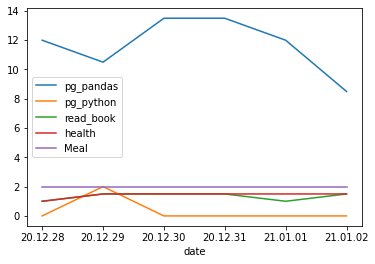

In [8]:
# 이제 그래프를 그려보겠습니다. 
# 선형그래프 

df.plot(figsize=(6, 4));

# figsize는 그래프의 사이즈를 변경하는 코드에요 실험해보세요 

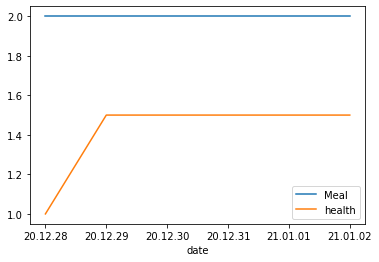

In [9]:
# 이제는 column의 특정한 데이터만 출력해볼까요?

df.plot(y=["Meal", "health"])

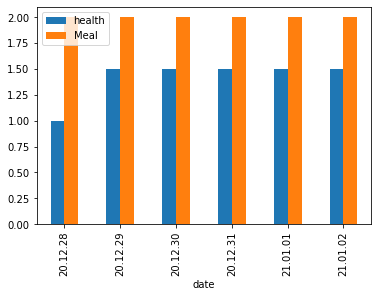

In [10]:
# 이제는 막대그래프를 그려보겠습니다. 

df.loc[:, "health":"Meal"].plot(kind="bar");

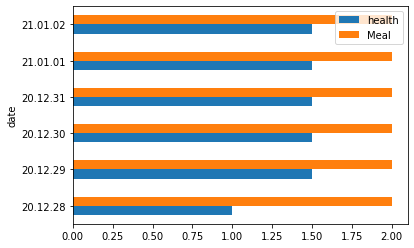

In [11]:
# 막대그래프를 가로로 정렬해보겠습니다. 

df.loc[:, "health":"Meal"].plot(kind="barh");

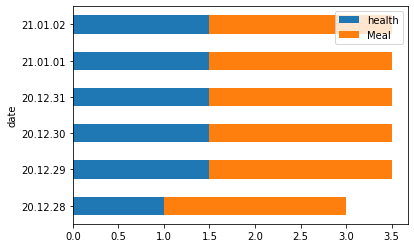

In [12]:
# 가끔 그래프를 보면 중첩을 시켜서 표현하기도 하죠?
# 우리도 할 수 있습니다. 아주 간단하게요! 

df.loc[:, "health":"Meal"].plot(kind="barh", stacked=True);

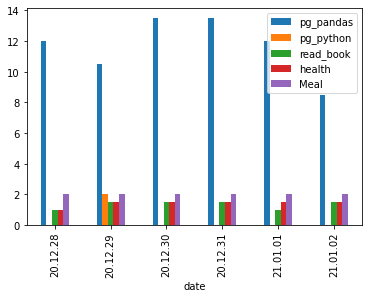

In [13]:
# 이제는 막대그래프를 그려보겠습니다. 

df.plot(kind="bar");

# [분석결과] : pandas를 많이 공부했고, python은 투자를 조금했구나를 알 수 있죠?

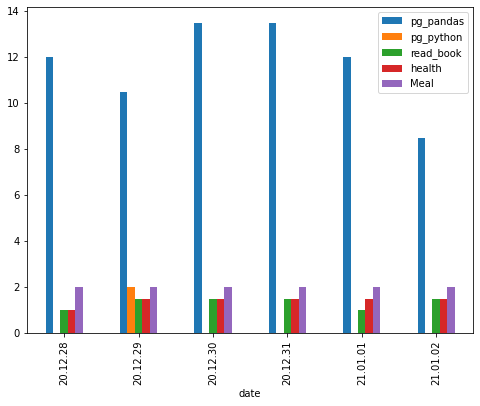

In [14]:
# 위에서 사이즈 연습해보신거 맞죠? 혹시 몰라 이곳에서 복습을 해볼께요
# 위 표를 보면 먼가 사이즈를 조정해야겠다는 생각이 들죠? 

df.plot(kind="bar", figsize=(8, 6));

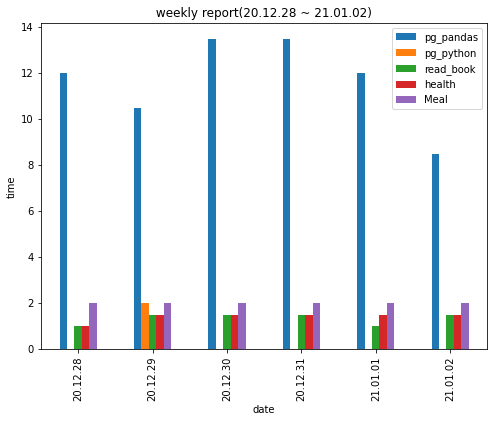

In [15]:
# 그런데, 먼가 표가 허전하죠? 
# 이것저것 넣어보겠습니다. 

df.plot(kind="bar", figsize=(8, 6));

# 표의 제목 넣기 
plt.title(" weekly report(20.12.28 ~ 21.01.02) ")

# x축 이름 넣기 
plt.xlabel("date");

# y축 이름 넣기 
plt.ylabel("time");

# 이렇게 legend를 지정할수도 있습니다. 
plt.legend(["pg_pandas", "pg_python", "read_book", "health", "Meal"]);

#[분석결과] : 레이블들을 추가함으로 처음보는 분들도 한눈에 알아볼 수 있도록 표를 정리하였습니다. 

In [16]:
# 그런데 이렇게 보아서는 각 항목별로 얼마의 시간을 투자했는지 알기가 어렵네요 
# 그래서 목적에 많는 그래프를 이용한 것이 무척 중요합니다. 
# 원형으로 해서 몇퍼센트를 투자했는지를 보면 편하겠다는 생각이 들었습니다. 
# 이에, 항목별 총 투자한 시간을 구해야겠죠?

In [17]:
# columns_sum이라는 변수에 열의 합을 넣어주려고 합니다. 
df1 = columns_sum = df.sum()
df1

pg_pandas    70.0
pg_python     2.0
read_book     8.0
health        8.5
Meal         12.0
dtype: float64

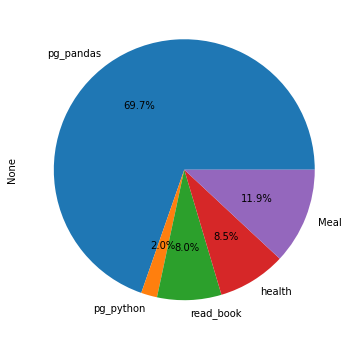

In [18]:
# 원형은 pie라는 코드를 써서 구현할 수 있고
# autopct는 소수점 몇째자리까지 표현 할 것인지 
# figsize는 위에서도 언급한것처럼 사이즈를 처리하는 코드입니다. 

df1.plot(kind="pie", autopct="%0.1f%%", figsize=(6, 6));

# [분석결과] : 이렇게 보니 한주동안 pandas를 얼마나 했는지 한눈에 확! 들어옵니다. 그래프 type 선택의 중요성!!!

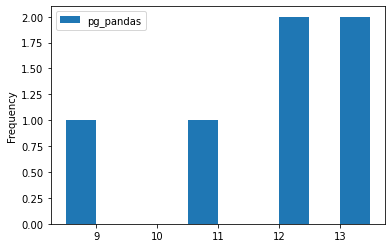

In [19]:
# 이번에는 히스토그램 그래프를 배워보겠습니다. 

df.plot(kind="hist", y="pg_pandas");

# [분석결과]
# -. y축은 빈도이고, x는 투자한 시간을 의미합니다. 8.5시간을 1회, 10.5 시간을 1회 등을 투자했습니다. 

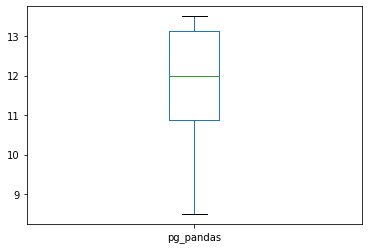

In [20]:
# 지금부터 볼 그래프는 박스플롯이라는 그래프 입니다. 
# 역시 데이터는 pandas 공부 투자시간입니다. 

df.plot(kind="box", y="pg_pandas")

In [21]:
# 딱! 보고 이게 머야? 라고 생각하신분????
# 저는 이게 도대체 머냐? 라는 말을 가장 먼저 했는데요. 
# 아래 그림을 보고 찬찬히 설명드리겠습니다. 
df.describe()

# 우리는 앞에서 describe를 배웠습니다. 
# describe를 그림으로 표시했다고 생각하면 쉽게 다가옵니다. 
# 일단, 무엇이든 우리가 알고 있는 내용과 연결을 시키는게 매우 중요하다는 거 아시죠?

#min : Minimum
#25% : First Quartile
#50% : Median 
#75% : Third Quatile
#MAX : Maximum
#outlier : 이상치(결측치) 

# 그런데 이상하죠? 우리는 min으로 최소값을 알고 있는데 이상치가 더 아래 있습니다?
# 이게 먼일이죠? 이상치를 우리는 그냥 이상한 놈들도 직관적으로 받아들였는데
# 어떤 놈은 이상한 것고 어떤 놈은 최소값이 될까요?
# 그건 IQR 값을 알고 있을 때 설명이 가능한데,,,, 여기서는 설명하지 않도록 하겠습니다. 
# 괜히 머리가 아프실 수 있습니다. 
# 정 궁금하신 분들은 정규분포, IQR, 이상치를 결합하여 구글링해보시면 됩니다. 

,pg_pandas,pg_python,read_book,health,Meal
count,6.000000,6.000000,6.000000,6.000000,6.0
mean,11.666667,0.333333,1.333333,1.416667,2.0
std,1.914854,0.816497,0.258199,0.204124,0.0
min,8.500000,0.000000,1.000000,1.000000,2.0
25%,10.875000,0.000000,1.125000,1.500000,2.0
50%,12.000000,0.000000,1.500000,1.500000,2.0
75%,13.125000,0.000000,1.500000,1.500000,2.0
max,13.500000,2.000000,1.500000,1.500000,2.0


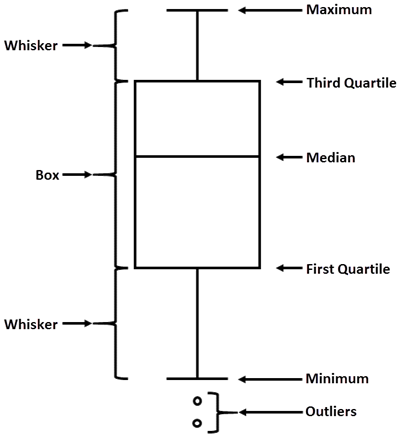

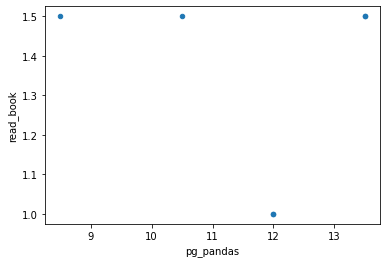

In [22]:
# 다시 그래프로 돌아와보겠습니다. 
# 산점도는 두 데이터의 상관관계를 볼 수있는 그래프입니다. 
# 지금부터 산점도 그래프를 그려보겠습니다. 
# pandas와 read_book 사이에 무슨 관계가 있을까요?

df.plot(kind="scatter", x="pg_pandas", y="read_book")

# [분석결과]
# -. 여러분 그래프를 그릴 수 있으십니까? 전 어떠한 그래프도 그릴 수가 없었습니다. 즉 관계가 없다는거죠!
# -. 실제로도 책을 읽는 것과 pandas는 관계가 없습니다. 제가 좋아하는 책만 전 읽거든요..ㅎㅎ pandas 관련된거 말구..ㅎ


## 2) Seaborn

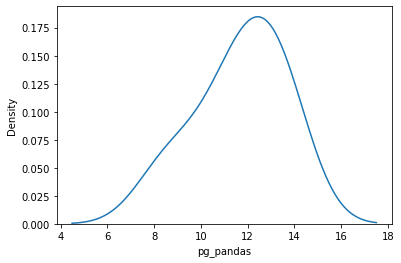

In [23]:
# kdeplot : 정규분포 곡선 그리기 

sns.kdeplot(df["pg_pandas"]);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


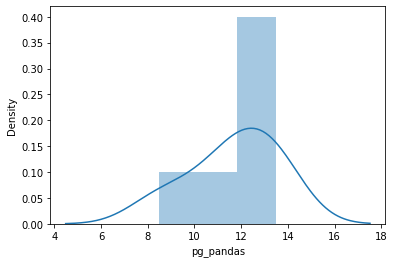

In [24]:
# 정규분포 곡선에 아래 바와 함께 그리는 방법 

sns.distplot(df["pg_pandas"]);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


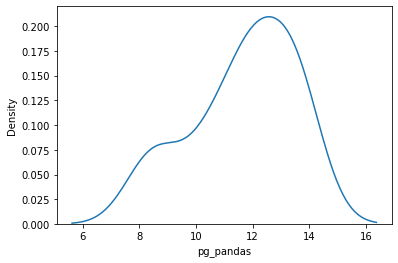

In [25]:
# 위 그래프는 실제 데이터 값과 다릅니다. 우리가 kde로 추측한 값이기 때문입니다.
# 그럼 추측을 어느정도 할지를 bw로 설정해줄 수 있다. 
sns.kdeplot(df["pg_pandas"], bw=0.5);
# 히스토그램의 막대 갯수를 설정해주는 것과 비슷하넹! 라고 생각할 수 있겠죠?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


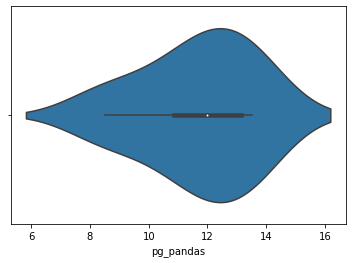

In [26]:
# 바이올렌 모습을 닮았다고 하는 그래프 인데요
# 한가운데를 반으로 접어서 보시면 됩니다. 저는 이녀석이 유용한지 아직 잘 모르겠습니다..

sns.violinplot(df["pg_pandas"]);
#sns.violinplot(y=df["pg_pandas"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


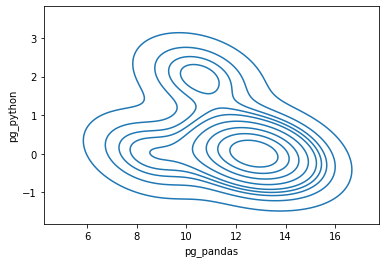

In [27]:
# 등고선 : 이렇게 등고선도 그릴 수 있습니다. 무엇을 의미하는지 알기 매우 어렵죠?
sns.kdeplot(df["pg_pandas"], df["pg_python"]);

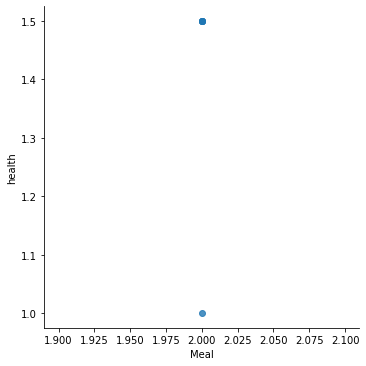

In [28]:
# 역시 이 그래프를 보고 무엇인가를 알 수가 없죠? 
sns.lmplot(data=df, x="Meal", y="health");

### 원래 lmplot는 아래와 같은 그래프로 상관관계를 알 수 있는 유용한 녀석인데 말이죠?  
  
  ### 이처럼 데이터에 맞게 그래프를 찾는게 매우 중요합니다. 

## joinplot 예시 

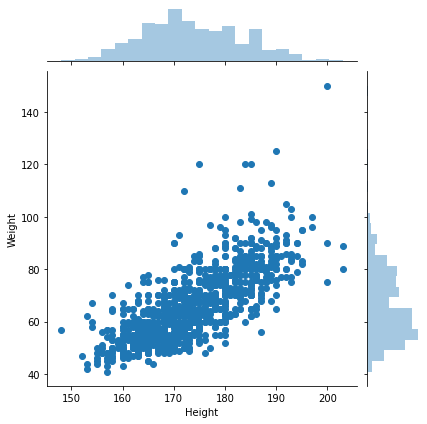

과제 

sns.catplot을 x, y, kind, hue를 모두 이용하여 도표를 그려보세요  
  
sns.hitmap의 corr, annot를 이용하여 도표를 그려보세요  
  
sns.violinplot의 x, y, hue를 이용하여 도표를 그려보세요  
  
sns.joinplot를 x, y를 이용하여 도표를 그려보세요  
  
sns.Clustermap을 그려보세요 

본 과제를 적절히 시행되면 나오는 도표의 그림은 아래를 참조세요
꼭 해보시길 바랍니다 ^^ 

# 과제 예시  
  
  ## catplot - x, y, kind(strip)만 이용시 


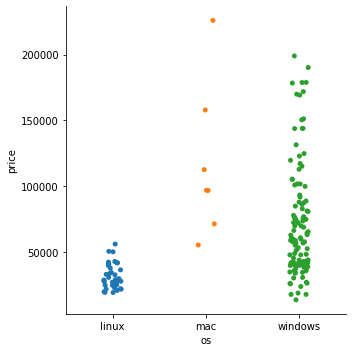

## catplot - x, y, kind(swarm), hue만 이용시 

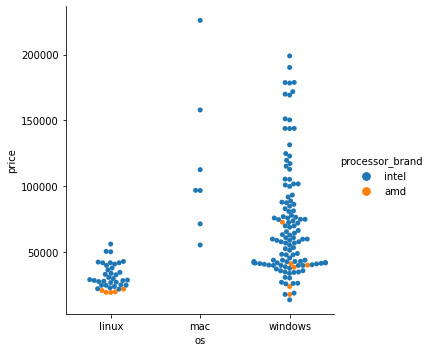

## heatmap - corr, annot 이용시

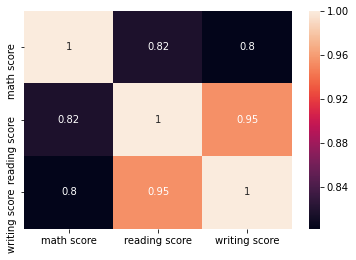

## violinplot - x, y, hue

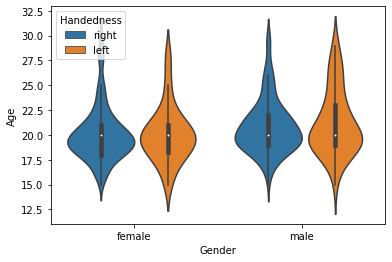

## joinplot 예시

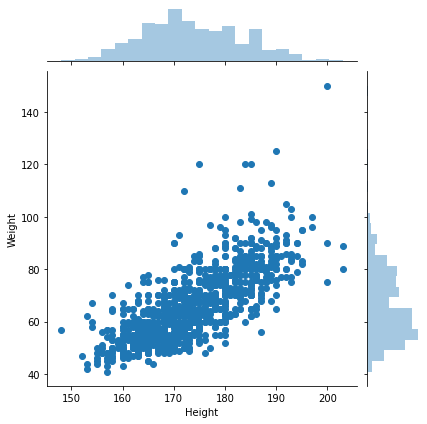

## clustermap 예시 

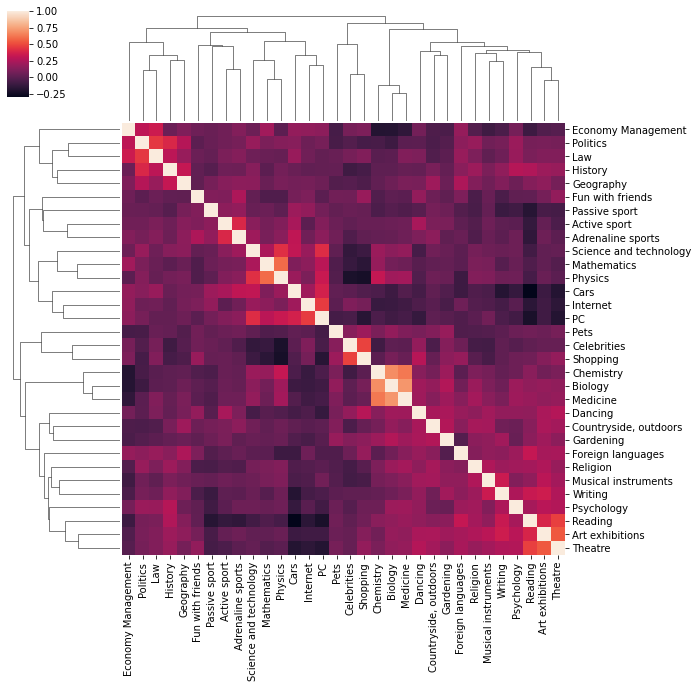